In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
solar = pd.read_csv('solar.csv') 
#solar.head(2)
solar.shape

(542618, 20)

In [154]:
pd.options.display.max_colwidth = 130
solar_dictionary = pd.read_excel('solar_dictionary.xlsx', index_col='Column Name')
solar_dictionary

,Description
Column Name,
state,This data is from state Texas
date_installed,it represents the approximate time when installation was done
incentive_prog_names,They pay rebate per Watt (W) of solar power installed on your home
size_kw,Size of solar panels
zipcode,Host customer zipcode
install_type,Consumer types for solar panels
installer,Companies that install solar panels
cost_per_watt,The average price per watt for solar panels
cost,The reported cost of modules.


In [140]:
solar.isna().sum()

state                        0
date_installed               0
incentive_prog_names         0
size_kw                      0
appraised               398692
zipcode                      0
install_type             32000
installer                81825
cost_per_watt                0
cost                         0
city                         0
utility_clean                0
tech_1                  132040
model1_clean            132040
county                       0
annual_PV_prod               0
annual_insolation            0
rebate                  173545
sales_tax_cost          199029
tracking_type           180984
dtype: int64

In [141]:
solar.nunique()

state                       20
date_installed            4913
incentive_prog_names        55
size_kw                  27148
appraised                    1
zipcode                   8693
install_type                 6
installer                 8621
cost_per_watt           263690
cost                    154998
city                      8819
utility_clean              311
tech_1                      11
model1_clean              2862
county                     539
annual_PV_prod          318701
annual_insolation        70570
rebate                   51680
sales_tax_cost          188769
tracking_type                4
dtype: int64

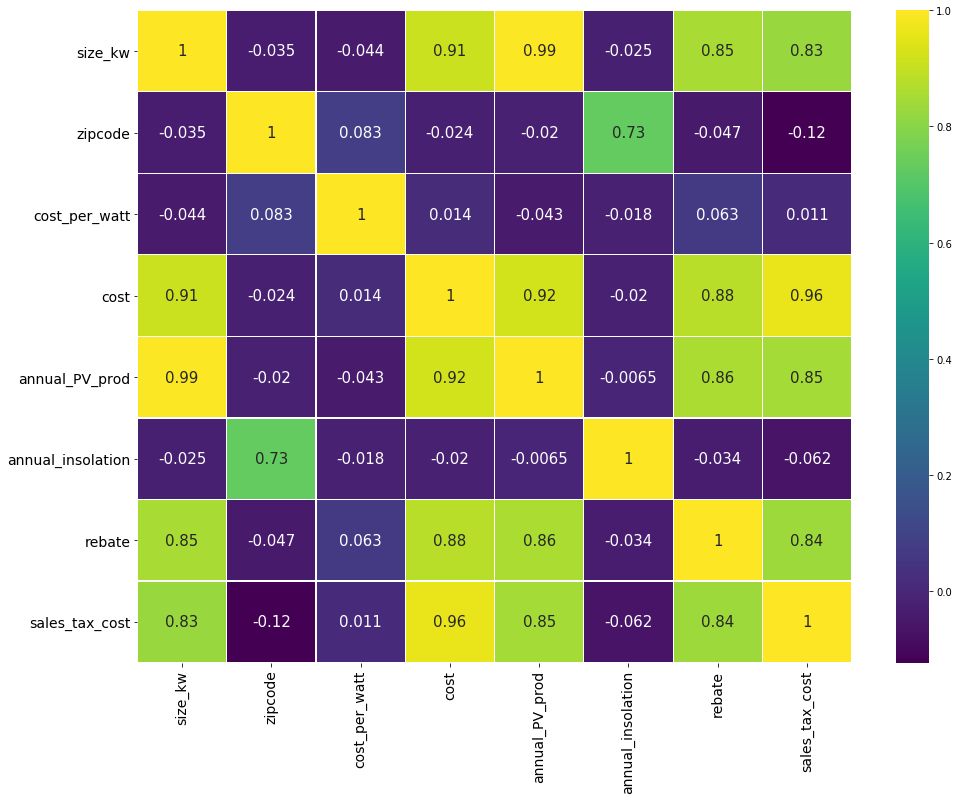

In [133]:
sns.heatmap(solar.corr(),annot=True,cmap='viridis',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(16,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [218]:
# col1 .explore state based overall cost to set up solar panels
solar['state'].value_counts()

CA    299411
AZ     64848
MA     59671
NY     43703
CT     14579
NV     13986
NJ      7710
PA      7141
MD      6263
NM      6221
TX      5627
DE      3004
NH      2870
OR      2228
WI      1883
FL      1585
MN       747
ME       441
UT       413
RI       287
Name: state, dtype: int64

In [219]:
# col2 .Will not be helpful as entire data is from 2016. We can see explore seasonal variability in panel installation
#solar['date_installed'].value_counts()

In [220]:
# col3: 'incentive_prog_names'
solar['incentive_prog_names'].value_counts()

California Public Utilities Commission (California Solar Initiative)          147528
California Public Utilities Commission (Non-CSI Net Metered Systems)           78721
New York State Energy Research and Development Authority                       43703
Massachusetts Clean Energy Center                                              35721
Arizona Public Service                                                         35434
California Energy Commission (Emerging Renewables Program)                     27439
Massachusetts Department of Energy Resources                                   23950
Los Angeles Department of Water & Power                                        18433
California Energy Commission (New Solar Homes Partnership)                     16864
Salt River Project                                                             14982
Connecticut Clean Energy Finance and Investment Authority                      14579
NV Energy                                                        

In [221]:
# col4. bigger the size bigger will be the cost of installation
#solar.groupby('state').agg({'size_kw':'mean'})
solar.groupby('appraised').agg({'size_kw':'mean'})

,size_kw
appraised,
True,7.213743
False,13.200071


In [222]:
# col5.how cost varies between no appraised and appraised
solar['appraised'].unique()

array(['False', True], dtype=object)

In [223]:
solar['appraised'].fillna('False', inplace=True)

In [224]:
solar.groupby('appraised').agg({'cost':'mean'})

,cost
appraised,
True,38183.732717
False,64971.807130


In [225]:
# col 6
#solar['zipcode']

In [226]:
# col 7: 'install_type'
solar['install_type'].value_counts()

residential    487826
commercial      13679
government       3062
unknown          2819
nonprofit        2347
educational       885
Name: install_type, dtype: int64

In [227]:
# col 8: 'installer'
solar['installer'].value_counts().head()

SolarCity    114057
Vivint        19287
Verengo       11956
Sunpower      11640
Rec Solar     10787
Name: installer, dtype: int64

In [228]:
solar.groupby(['state','city']).agg({'installer':'count'})

installer
state city                        
AZ    AGUILA                    10
      AJO                       10
      AMADO                     13
      APACHE JUNCTION          490
      ARIVACA                    6
      ARIZONA CITY             115
      ARLINGTON                  4
      ASH FORK                   3
      AVONDALE                 618
      BAGDAD                     0
      BELLEMONT                  4
      BENSON                   107
      BISBEE                    10
      BLACK CANYON CITY         16
      BOUSE                      7
      BOWIE                     14
      BUCKEYE                 1769
      BULLHEAD CITY            250
      CAMP VERDE                87
      CAREFREE                  37
      CASA GRANDE              694
      CATALINA                   2
      CAVE CREEK               489
      CENTRAL                    4
      CHANDLER                1650
      CHINO VALLEY             176
      CHLORIDE                   1
      CLARKDALE                 55
      CLAY SPRINGS               2
      COCHISE                   12
...                            ...
WI    WINNECONNE                 0
      WISCONSIN RAPIDS           0
      Walworth                   1
      Washburn                   6
      Waterford                  2
      Waterloo                   4
      Watertown                  2
      Waukesha                   5
      Waunakee                   7
      Waupaca                   18
      Waupun                     2
      Wausau                     7
      Wausaukee                  1
      Wauwatosa                  0
      Webster                    5
      West Allis                 0
      West Bend                  5
      West Salem                 1
      Westby                     0
      Westfield                  1
      Weyauwega                  2
      White Lake                 1
      Whitehall                  1
      Whitewater                 4
      Wild Rose                  3
      Williams Bay               2
      Winneconne                 2
      Winter                     0
      Wisconsin Dells            4
      Wisconsin Rapids          13

[9977 rows x 1 columns]

In [229]:
# col 9: 'cost_per_watt'
solar.groupby('state').agg({'cost_per_watt':'mean'}).head()

,cost_per_watt
state,
AZ,4.954795
CA,5.875906
CT,4.890957
DE,5.589670
FL,6.683918


In [230]:
# col 10: 'cost'
solar.groupby('state').agg({'cost':'mean'})#.head()

,cost
state,
AZ,52071.310622
CA,55189.334629
CT,45243.692277
DE,56388.232417
FL,106981.703842
MA,90463.306636
MD,41413.035537
ME,24895.732200
MN,45186.691941


In [231]:
solar.groupby('state').agg({'size_kw':'mean'})
# size_kw is higher for FL and NJ and thats why mean cost is higher 

,size_kw
state,
AZ,10.350952
CA,10.112527
CT,9.089071
DE,10.239266
FL,20.552938
MA,23.874710
MD,8.436731
ME,6.609769
MN,7.447631


In [232]:
# col 11: 'city'
solar['city'].nunique()#value_counts()

8819

In [233]:
filt = solar['city'].value_counts()>1000
filt.sum()

74

In [234]:
# col 12: 'utility clean'
filt = solar['utility_clean'].value_counts()>1000
filt.sum()

41

In [235]:
# col 13: 'tech_1'
solar['tech_1'].value_counts()

Poly              238718
Mono              159304
crystalline         6107
Mono + a-Si         4703
CdTe                 631
CIGS                 552
a-Si                 392
a-Si + Micro-c        54
Thin Film             44
multiple              38
CIS                   35
Name: tech_1, dtype: int64

In [244]:
# col 14: 'model1_clean'
#solar['model1_clean'].value_counts()

multiple matches                67817
SPR-327NE-WHT-D                 15831
REC260PE                        11661
KU265-6ZPA                       8379
KU260-6XPA                       7475
SPR-230NE-BLK-D                  6007
TSM-250PA05.18                   5672
SPR-E20-327                      5180
SPR-225-BLK-U                    5073
TSM-245PA05.18                   4866
CS6P-250PX                       4150
SPR-230-WHT-U                    3785
REC260PE(BLK)                    3577
SPR-225E-BLK-D                   3538
SW 280 Mono Black                3368
CS6P-255PX                       3304
SPR-X21-345                      3153
CS6P-250P                        3015
REC245PE (BLK)                   2783
KD215GX-LPU                      2605
SW 285 Mono                      2512
TSM-250PA05.08                   2461
NU-U235F1                        2432
SPR-245NE-WHT-D                  2375
KD210GX-LPU                      2367
LG255S1C-G2                      2295
STP185S-24/A

In [237]:
# col 15: 'county'

In [238]:
# col 16: 'annual_PV_prod'

In [239]:
# col 17: 'annual_insolation'

In [209]:
# col 18: 'rebate'
solar.groupby('state').agg({'rebate':'mean'})

,rebate
state,
AZ,7822.130565
CA,8291.417076
CT,22881.542602
DE,13265.076866
FL,22310.332544
MA,8841.565887
MD,3059.501832
ME,2091.888889
MN,8479.264269


In [216]:
# rebate null values: rebate:173545, all in NM
#filt = solar['state']=='NM'
#solar[filt]['rebate'].unique(), solar[filt]['rebate'].isna().sum()

In [ ]:
# col 19: 'sales_tax'


In [217]:
# col 20: 'tracking_type'
solar['tracking_type'].value_counts()

Fixed          360093
Single-Axis       748
Dual-Axis         509
Mixed             284
Name: tracking_type, dtype: int64